# Analysis Document

## Intro

This notebook is used to do the whole process on this repository, starting from scraping the data from the targetted web, cleaning the scraped quotes data, and analysis on the scraped data. There will be x types of analysis to gain insights from them.

1. Frequency Analysis: Count frequent authors, words, and tags.

2. Sentiment Analysis: Determine positive, negative, or neutral sentiments in quotes.

3. Text Length Analysis: Analyze quote lengths (average, longest, shortest).

4. Author Insights: Analyze authors' diversity in topics, sentiment trends, or common themes.

5. Relationship Between Tags: Analyze co-occurrence of tags and visualize relationships.

6. Clustering and Grouping: Group similar quotes based on content or sentiment.

In each analysis, there will be visual summaries to give better interpretation of the results, such as bar charts, word clouds, etc.

## 1. Frequency Analysis

In [1]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from data_scraping import data_scraper
from data_cleaning import data_cleaner
from collections import Counter
from wordcloud import STOPWORDS

# URL of the website to scrape
url_base = "http://quotes.toscrape.com"

In [2]:
# Scrape the data
scraped_data = data_scraper(url_base)

# Save the raw scraped data into a CSV format
raw_file = "quotes_raw.csv"
scraped_data.to_csv(raw_file, index=False)

=== Get response from http://quotes.toscrape.com. ===
=== Status code 200. ===
=== Start scraping. ===
=== Done scraping. ===
=== Move to the next page. ===
=== Get response from http://quotes.toscrape.com/page/2/. ===
=== Status code 200. ===
=== Start scraping. ===
=== Done scraping. ===
=== Move to the next page. ===
=== Get response from http://quotes.toscrape.com/page/3/. ===
=== Status code 200. ===
=== Start scraping. ===
=== Done scraping. ===
=== Move to the next page. ===
=== Get response from http://quotes.toscrape.com/page/4/. ===
=== Status code 200. ===
=== Start scraping. ===
=== Done scraping. ===
=== Move to the next page. ===
=== Get response from http://quotes.toscrape.com/page/5/. ===
=== Status code 200. ===
=== Start scraping. ===
=== Done scraping. ===
=== Move to the next page. ===
=== Get response from http://quotes.toscrape.com/page/6/. ===
=== Status code 200. ===
=== Start scraping. ===
=== Done scraping. ===
=== Move to the next page. ===
=== Get response f

In [3]:
# Clean the CSV data: remove special characters in column `quote`
cleaned_file = "quotes_clean.csv"
data_cleaner(raw_file, cleaned_file)

=== Remove special characters in column `quote`. ===
=== Cleaning done. Now storing the cleaned data in a new CSV file. ===
=== The new CSV file has been created, named as quotes_clean.csv ===


In [4]:
# Load the cleaned data for analysis
data = pd.read_csv(cleaned_file)

In [5]:
data.head()

,quote,author,tag
0,The world as we have created it is a process o...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,It is our choices Harry that show what we trul...,J.K. Rowling,"abilities, choices"
2,There are only two ways to live your life One ...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,The person be it gentleman or lady who has not...,Jane Austen,"aliteracy, books, classic, humor"
4,Imperfection is beauty madness is genius and i...,Marilyn Monroe,"be-yourself, inspirational"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quote   100 non-null    object
 1   author  100 non-null    object
 2   tag     97 non-null     object
dtypes: object(3)
memory usage: 2.5+ KB


In [7]:
data.describe()

,quote,author,tag
count,100,100,97
unique,100,50,83
top,The world as we have created it is a process o...,Albert Einstein,love
freq,1,10,4


### 1.1. Count Frequent Authors

In [8]:
author_counts = data['author'].value_counts()
print("Top Authors:")
print(author_counts.head(10))

Top Authors:
author
Albert Einstein      10
J.K. Rowling          9
Marilyn Monroe        7
Dr. Seuss             6
Mark Twain            6
C.S. Lewis            5
Jane Austen           5
Bob Marley            3
Eleanor Roosevelt     2
Charles Bukowski      2
Name: count, dtype: int64


### 1.2. Count Frequent Words in Quotes

In [9]:
# Combine all quotes into a single string
all_quotes = " ".join(data['quote'])

# Remove stop words and split into individual words
stop_words = set(STOPWORDS)
words = [word.lower() for word in all_quotes.split() if word.lower() not in stop_words]

# Count word occurrences
word_counts = Counter(words)
print("Most Common Words:")
print(word_counts.most_common(10))

Most Common Words:
[('love', 23), ('will', 18), ('one', 15), ('never', 13), ('think', 12), ('life', 11), ('make', 10), ('good', 8), ('live', 7), ('know', 7)]


### 1.3. Count Frequent Tags

In [10]:
# Split tags by delimiter ", " and flatten the list
all_tags = [tag for tags in data['tag'].dropna() for tag in tags.split(", ")]
tag_counts = Counter(all_tags)
print("Most Common Tags:")
print(tag_counts.most_common(10))

Most Common Tags:
[('love', 14), ('inspirational', 13), ('life', 13), ('humor', 12), ('books', 11), ('reading', 7), ('friendship', 5), ('friends', 4), ('truth', 4), ('simile', 3)]


### 1.4 Viz - Authors

In [11]:
import matplotlib.pyplot as plt

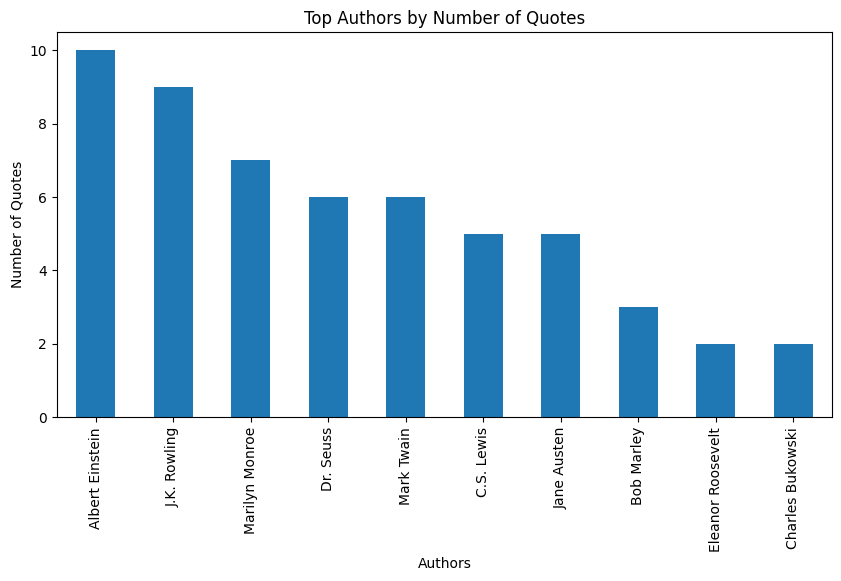

In [12]:
author_counts.head(10).plot(kind='bar', figsize=(10, 5))
plt.title("Top Authors by Number of Quotes")
plt.xlabel("Authors")
plt.ylabel("Number of Quotes")
plt.show()

### 1.5 Viz - Words

In [13]:
from wordcloud import WordCloud

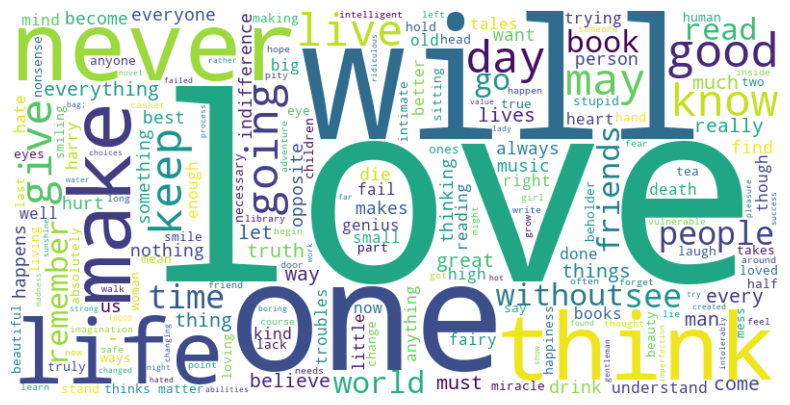

In [14]:
# Wordcloud of Frequent Words
wordcloud_words = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_words, interpolation='bilinear')
plt.axis("off")
plt.show()

### 1.6. Viz - Tags

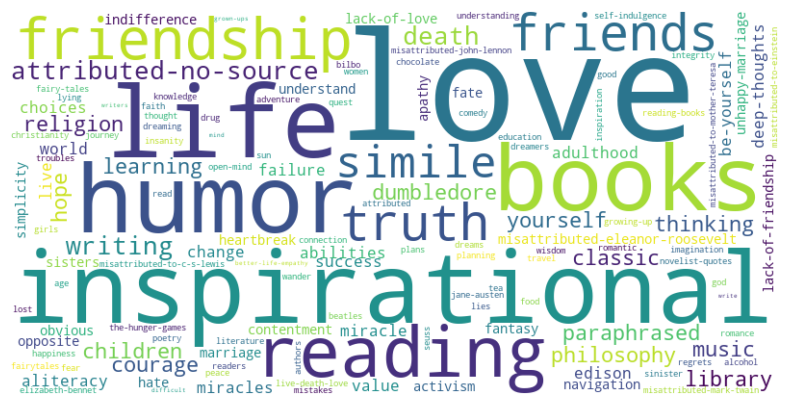

In [15]:
# Wordcloud of Frequent Tags
wordcloud_tags = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tags, interpolation='bilinear')
plt.axis("off")
plt.show()